# Importing Stuff

In [1]:
from RBM import *
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import defaultdict


# Check Gibbs Sampling Works

In [2]:
def toBinary(arr):
    arrCpy = arr.copy()
    for i in range(len(arrCpy)):
        if arrCpy[i] == -1:
            arrCpy[i] = 0 
    myStr = ''.join(map(str, arrCpy))
    binaryNumber = int(myStr, 2)
    return binaryNumber

# Testing Block 1

In [3]:
# 1st Bullet point: set up the RBM with the according instructions
num_visible = 5
num_hidden = 2
rbm1 = RBM(num_visible=num_visible, num_hidden=num_hidden)
rbm1.initializeBiases()
rbm1.initializeWeights()

print(rbm1.hidden_biases, rbm1.visible_biases)

[0. 0.] [0. 0. 0. 0. 0.]


For p(h|v) first plot uses Gibbs sampling, where fixed v and then sample h from there. I repeatedly sample from the conditional distribution of p(h|v) and over many iterations, this process yields an empirical distribution that approximates p(h|v), which is what is in the first histogram.

In the 2nd histogram I am plotting the real distribution my computing the energies, they are the same so the MCMC method will check out.

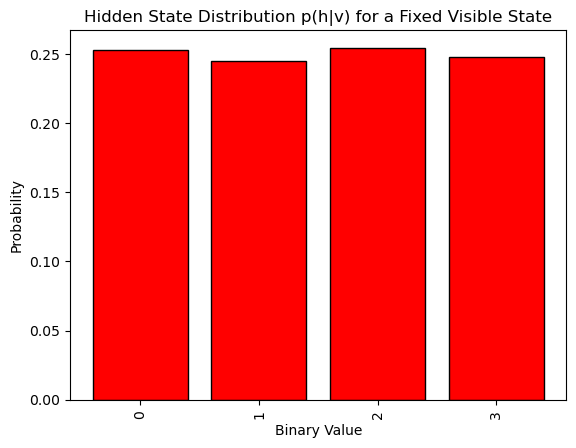

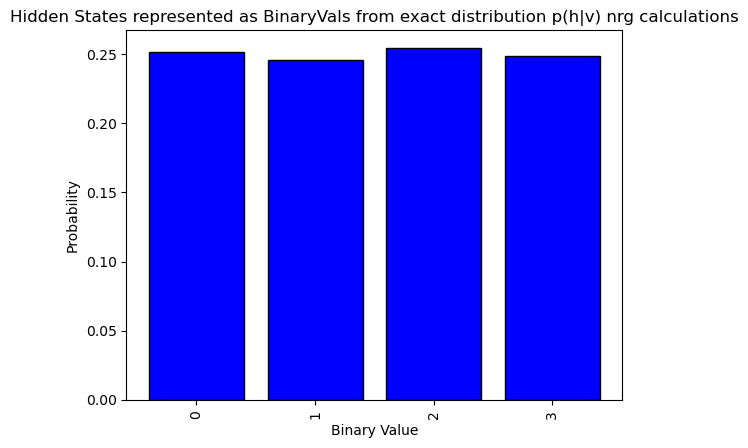

In [4]:
'''
Calculated the probability that we getting a hidden state given we fixed the visible state using our sampling functions for p(h|v)
'''
fixed_random_v = np.random.choice([-1, 1], rbm1.num_visible) 
samples = []

for _ in range(100000):
    sample_h = rbm1.get_newH(fixed_random_v)
    samples.append(sample_h)

binary_samples = []
for sample in samples:
      binary_samples.append(toBinary(sample))

unique, counts = np.unique(binary_samples, return_counts=True)
calculatedProbabilities = counts / counts.sum()
plt.bar(unique, calculatedProbabilities, color='r', edgecolor='black')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Hidden State Distribution p(h|v) for a Fixed Visible State')
plt.xticks(unique, rotation=90)
plt.show()

'''
Calculated the probability that we getting a hidden state given we fixed the visible state, using brute force compute_energy
    1. generate all the possible hidden states 2^num_hidden = 4
    2. For each sample_h from the allpossibleStates, compute the energy, normalize, plot
'''
uniqueSample_h = list(itertools.product([-1, 1], repeat=num_hidden))
energies = []
binary_samples = []

for sample_h in uniqueSample_h:
    sample_h = np.array(sample_h)
    binary_samples.append(toBinary(sample_h))
    energy = np.exp(-rbm1.compute_energy(fixed_random_v, sample_h))
    energies.append(energy)

nrgProbabilities = energies / np.sum(energies)

plt.bar(binary_samples, nrgProbabilities, color='b', edgecolor='black')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Hidden States represented as BinaryVals from exact distribution p(h|v) nrg calculations')
plt.xticks(binary_samples, rotation=90)
plt.show()

'''
Make sure that discrepancies between the sampling method and the energy calculation are small/non-existent
'''
for i in range(len(calculatedProbabilities)):
	error = np.abs(calculatedProbabilities[i] - nrgProbabilities[i])
	if(error >= 0.01):
		print("discrepancy greater than 0.01")

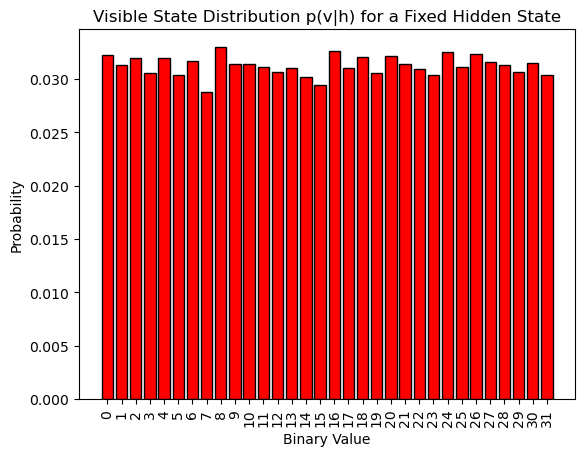

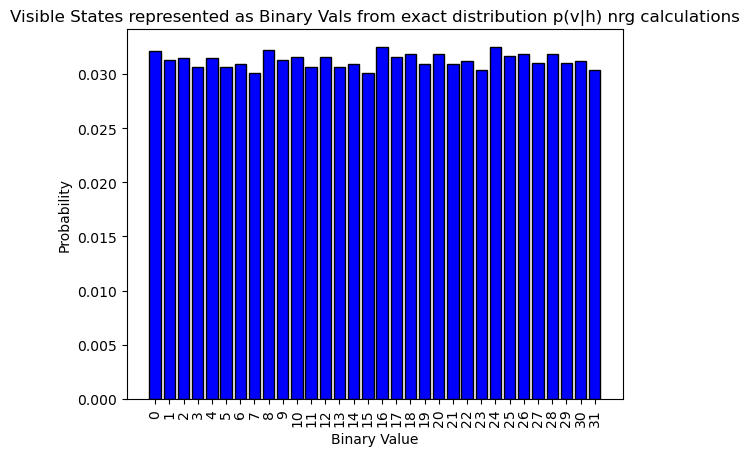

In [5]:
'''
Calculated the probability of getting a visible state given we fixed the hidden state using our sampling functions for p(v|h)
'''
fixed_random_h = np.random.choice([-1, 1], rbm1.num_hidden) 
samples = []

for _ in range(100000):
    sample_v = rbm1.get_newV(fixed_random_h)
    samples.append(sample_v)

binary_samples = []
for sample_v in samples:
      binary_samples.append(toBinary(sample_v))

unique, counts = np.unique(binary_samples, return_counts=True)
calculatedProbabilities = counts / counts.sum()
plt.bar(unique, calculatedProbabilities, color='r', edgecolor='black')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Visible State Distribution p(v|h) for a Fixed Hidden State')
plt.xticks(unique, rotation=90)
plt.show()

'''
Calculated the probability of getting a visible state given we fixed the hidden state, using brute force compute_energy
    1. generate all the possible visible states 2^num_visible
    2. For each sample_v from the allpossibleStates, compute the energy, normalize, plot
'''
uniqueSample_v = list(itertools.product([-1, 1], repeat=rbm1.num_visible))
energies_v = []
binary_samples_v = []

for sample_v in uniqueSample_v:
    sample_v = np.array(sample_v)
    binary_samples_v.append(toBinary(sample_v))
    energy = np.exp(-rbm1.compute_energy(sample_v, fixed_random_h))
    energies_v.append(energy)

nrgProbabilities_v = np.array(energies_v) / np.sum(energies_v)

plt.bar(binary_samples_v, nrgProbabilities_v, color='b', edgecolor='black')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Visible States represented as Binary Vals from exact distribution p(v|h) nrg calculations')
plt.xticks(binary_samples_v, rotation=90)
plt.show()

'''
Make sure that discrepancies between the sampling method and the energy calculation are small/non-existent
'''
for i in range(len(calculatedProbabilities)):
	error = np.abs(calculatedProbabilities[i] - nrgProbabilities_v[i])
	if(error >= 0.01):
		print("discrepancy greater than 0.01")

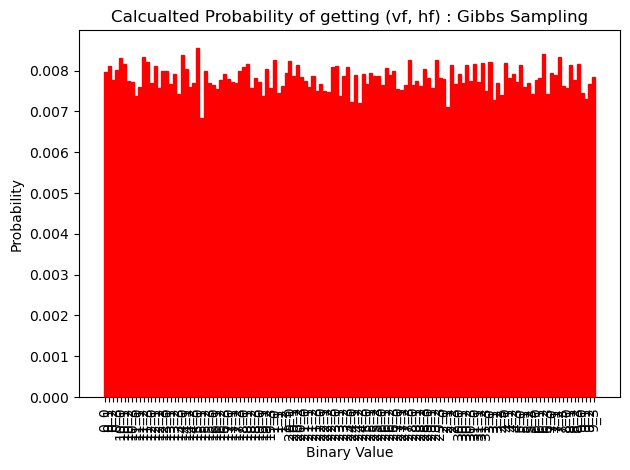

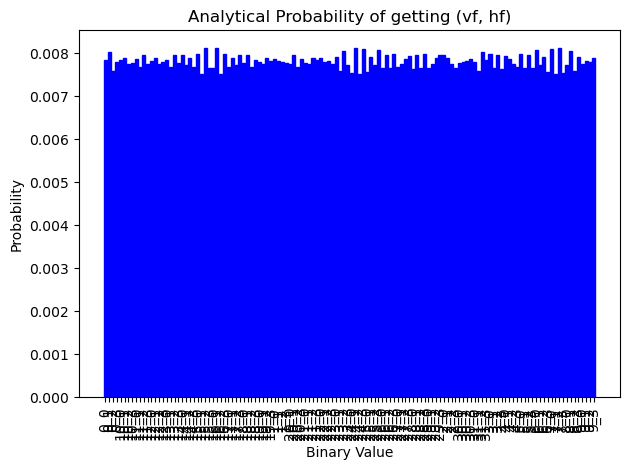

In [6]:
'''
Using the Gibbs Sampling Algorithm
    1. Generate all the vf and the hf
    2. Calcaulte the stringRepresentation of each config as binaryvf_binaryhf
    3. Normalize, plot, nice!
'''
vf, hf = rbm1.gibbs_sampling(k=10, num_samples=100000)

gibbs_sample_results = []
for i in range(len(vf)):
    stringRepresentationOfConfig = f"{toBinary(vf[i])}_{toBinary(hf[i])}"
    gibbs_sample_results.append(stringRepresentationOfConfig)

unique, counts = np.unique(gibbs_sample_results, return_counts=True)
gibbs_probabilities = counts / np.sum(counts)
sorted_unique = np.sort(unique)
plt.bar(unique, gibbs_probabilities, color='r', edgecolor='r')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Calcualted Probability of getting (vf, hf) : Gibbs Sampling')
plt.xticks(unique, rotation=90)
plt.tight_layout()
plt.show()

'''
Generating the P(v, h) histogram of the analytical probabilities
    1. gather all the possible pairs of v and h
    2. compute the energies of these pairs, record them
'''
energyMap = defaultdict(float)
hiddenConfigs = list(itertools.product([-1, 1], repeat=num_hidden))
visibleConfigs = list(itertools.product([-1, 1], repeat=num_visible))
Z = 0
final_vfs = []
for visibleConfig in visibleConfigs:
    for hiddenConfig in hiddenConfigs:
        v, h = np.array(visibleConfig), np.array(hiddenConfig)
        key = f"{toBinary(v)}_{toBinary(h)}"
        energy = np.exp(-rbm1.compute_energy(v, h))
        energyMap[key] = energy
        Z += energy
for key in energyMap:
    energyMap[key] /= Z

energy_keys = sorted(energyMap.keys())
energy_vals = []
for key in energy_keys:
    energy_vals.append(energyMap[key])

# plt.bar(unique, gibbs_probabilities, color='r', edgecolor='r')
plt.bar(energy_keys, energy_vals, color='b', edgecolor='b')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Analytical Probability of getting (vf, hf)')
plt.xticks(energy_keys, rotation=90)
plt.tight_layout()
plt.show() 

for i in range(len(gibbs_probabilities)):
    error = np.abs(gibbs_probabilities[i] - energyMap[unique[i]])
    if(error > 0.01):
        print(f"discrepancy greater than 0.01: {unique[i]}")

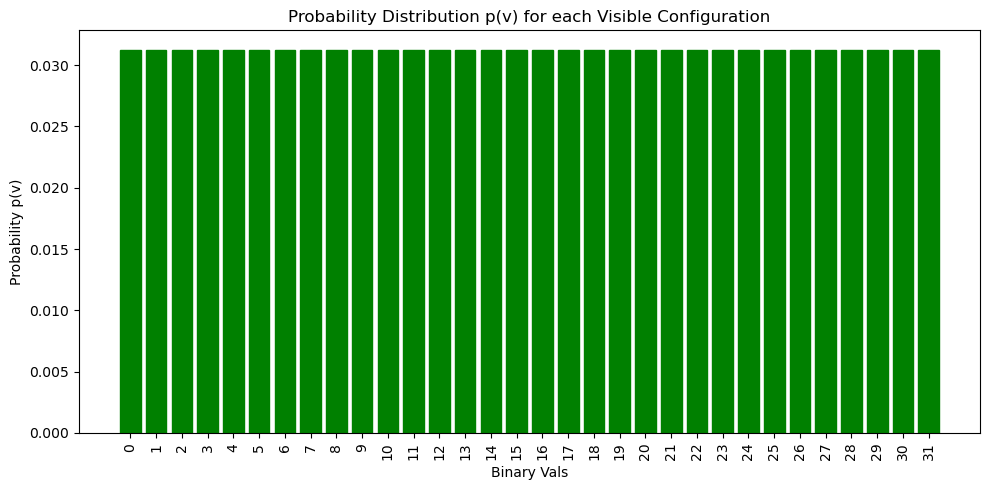

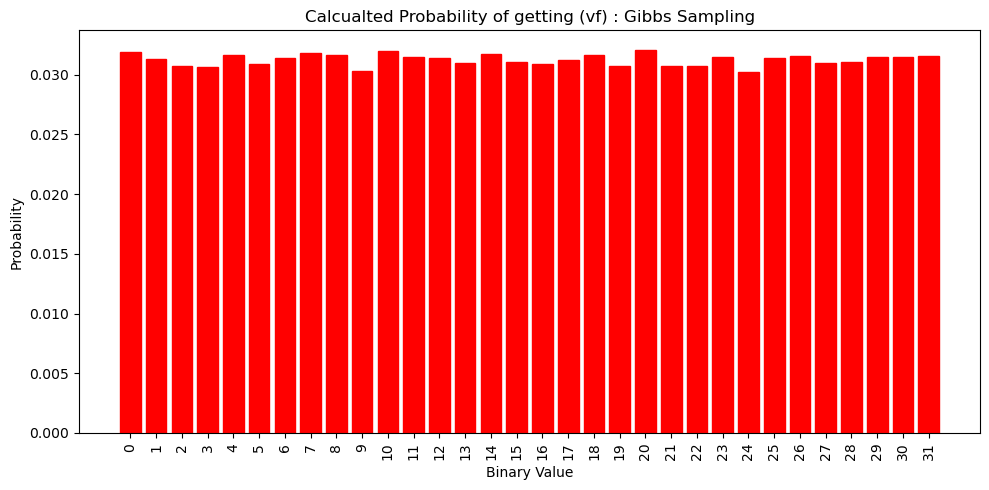

In [7]:
def compute_numerator(v, hiddenConfigs):
    numerator = 0
    for hiddenConfig in hiddenConfigs:
        h = np.array(hiddenConfig)
        energy = np.exp(-rbm1.compute_energy(v, h))
        numerator += energy
    return numerator

# This would store the probabilities for each visible configuration
probabilities = []
for visibleConfig in visibleConfigs:
    v = np.array(visibleConfig)
    numerator = compute_numerator(v, hiddenConfigs)
    probability_v = numerator / Z
    probabilities.append(probability_v)

plt.figure(figsize=(10, 5))
plt.bar(range(len(visibleConfigs)), probabilities, color='g', edgecolor='g')
plt.xlabel('Binary Vals')
plt.ylabel('Probability p(v)')
plt.title('Probability Distribution p(v) for each Visible Configuration')
plt.xticks(range(len(visibleConfigs)), [toBinary(np.array(v)) for v in visibleConfigs], rotation=90)
plt.tight_layout()
plt.show()

final_vfs = []
for i in range(len(vf)):
    final_vfs.append(toBinary(vf[i]))
    
unique, counts = np.unique(final_vfs, return_counts=True)
un_probs = counts / np.sum(counts)
sorted_unique = np.sort(unique)
plt.figure(figsize=(10, 5))
plt.bar(unique, un_probs, color='r', edgecolor='r')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Calcualted Probability of getting (vf) : Gibbs Sampling')
plt.xticks(unique, rotation=90)
plt.tight_layout()
plt.show()

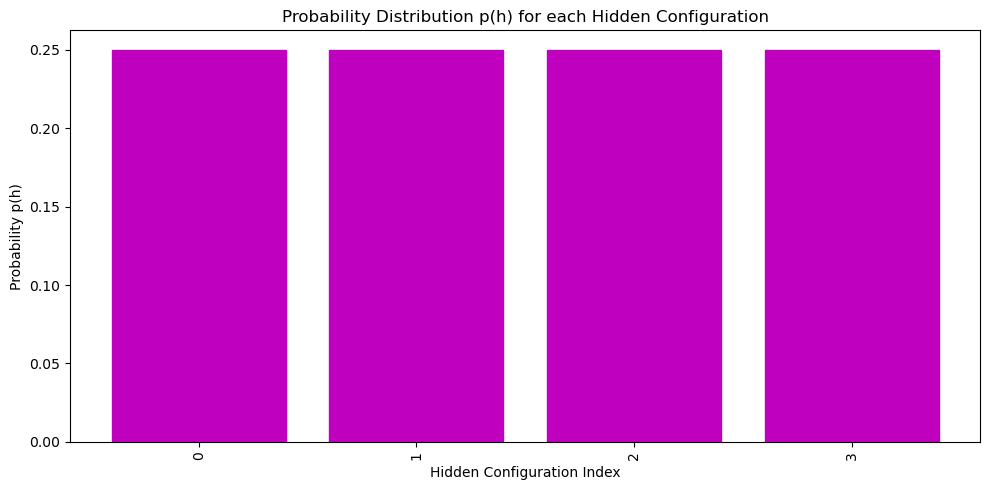

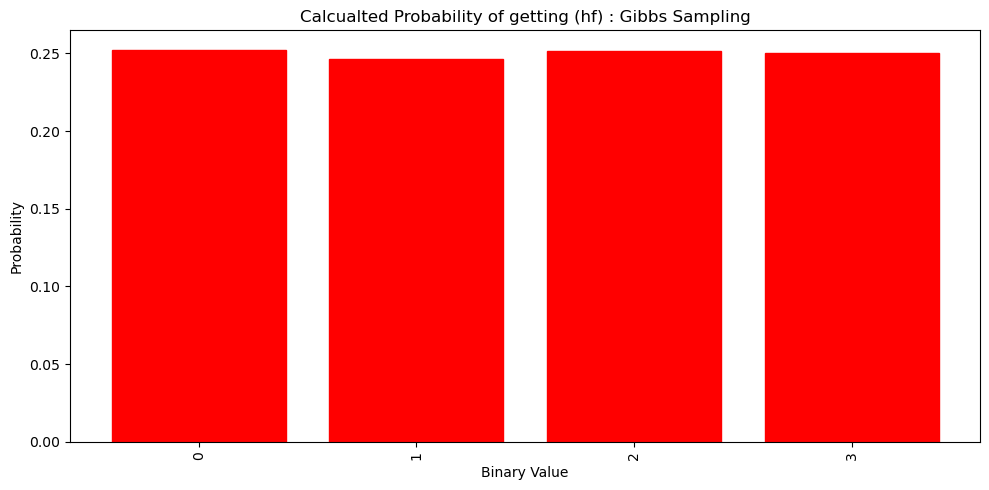

In [8]:
def compute_numerator_h(h, visibleConfigs, rbm):
    numerator = 0
    for visibleConfig in visibleConfigs:
        v = np.array(visibleConfig)
        energy = np.exp(-rbm.compute_energy(v, h))
        numerator += energy
    return numerator

hidden_probabilities = []
for hiddenConfig in hiddenConfigs:
    h = np.array(hiddenConfig)
    numerator = compute_numerator_h(h, visibleConfigs, rbm1)
    probability_h = numerator / Z
    hidden_probabilities.append(probability_h)

plt.figure(figsize=(10, 5))
plt.bar(range(len(hiddenConfigs)), hidden_probabilities, color='m', edgecolor='m')
plt.xlabel('Hidden Configuration Index')
plt.ylabel('Probability p(h)')
plt.title('Probability Distribution p(h) for each Hidden Configuration')
plt.xticks(range(len(hiddenConfigs)), [toBinary(np.array(h)) for h in hiddenConfigs], rotation=90)
plt.tight_layout()
plt.show()


final_hfs = []
for i in range(len(hf)):
    final_hfs.append(toBinary(hf[i]))
    
unique, counts = np.unique(final_hfs, return_counts=True)
un_probs = counts / np.sum(counts)
sorted_unique = np.sort(unique)
plt.figure(figsize=(10, 5))
plt.bar(unique, un_probs, color='r', edgecolor='r')
plt.xlabel('Binary Value')
plt.ylabel('Probability')
plt.title('Calcualted Probability of getting (hf) : Gibbs Sampling')
plt.xticks(unique, rotation=90)
plt.tight_layout()
plt.show()

# Implementing Grad Descent to Learn Simple Toy Prob Distribution

In [9]:
'''
Takes a number, these numbers will come from the toydistribution samples, and convert thats to a binaryArr of -1 and 1,
where -1 represents 0, and 1 represents 1.
'''
def num_toBinArr(num):
    binary = bin(num)[2:]
    binary = binary.zfill(5)
    binaryArr = []
    for i in range(len(binary)):
        if binary[i] == '0':
            binaryArr.append(-1)
        else:
            binaryArr.append(1)
    return binaryArr

'''
take the binary arr [1, -1, -1, -1, -1] -> convert to a binaryNumber 32 for example
'''
def binArr_toBinNum(arr):
    arrCpy = arr.copy()
    for i in range(len(arrCpy)):
        if arrCpy[i] == -1:
            arrCpy[i] = 0 
    myStr = ''.join(map(str, arrCpy))
    binaryNumber = int(myStr, 2)
    return binaryNumber

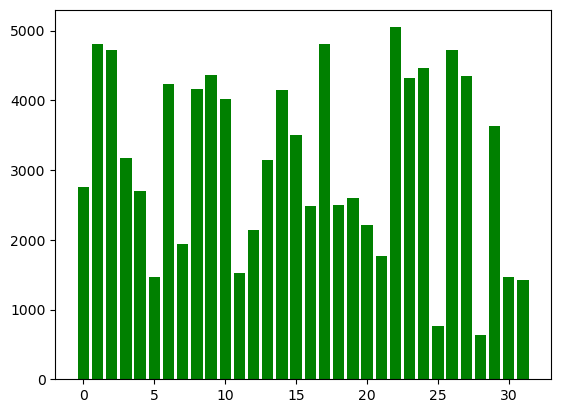

In [10]:
'''
Generate Samples from the Toy Distribution, and plot the histogram
'''
prob_dist = np.random.ranf(32)
prob_dist = prob_dist / np.sum(prob_dist)
toyDistributionSamples = np.random.choice(range(0,32), p = prob_dist, size = 100000)
unique, counts = np.unique(toyDistributionSamples, return_counts=True)
plt.bar(unique, counts, color='green')
plt.show()

data = [] 
for sample in toyDistributionSamples:
    binArr = num_toBinArr(sample)
    data.append(binArr)

In [11]:
'''
Train the rbm to learn the toy distribution
'''
num_visible = 5
num_hidden = 3
rbm2 = RBM(num_visible=num_visible, num_hidden=num_hidden)
rbm2.initializeBiases()
rbm2.initializeWeights()
rbm2.train_rbm(data=data, learning_rate=0.1, mini_batch_size=64, k=1, num_epochs=30)

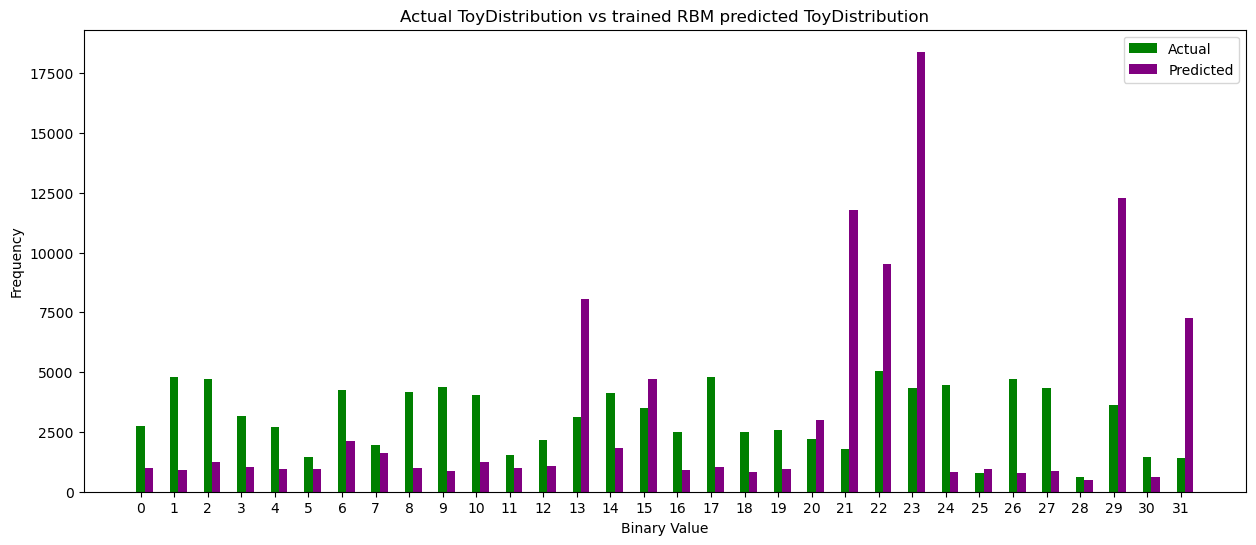

In [12]:
'''
Now that we have trained the RBM we need to check to see that it can reproduce the toy probability distribution
'''

vf, hf = rbm2.gibbs_sampling(k=1, num_samples=100000)

predictedToyDistribution = []
for i in range(len(vf)):
    predictedToyDistribution.append(binArr_toBinNum(vf[i]))

fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.25

uniqueIndices, counts = np.unique(toyDistributionSamples, return_counts=True)
bar1 = ax.bar(uniqueIndices, counts, bar_width, label='Actual', color='green')

uniquePredicted, predictedCounts = np.unique(predictedToyDistribution, return_counts=True)
bar2 = ax.bar(uniquePredicted + bar_width, predictedCounts, bar_width, label='Predicted', color='purple')

ax.set_xlabel('Binary Value')
ax.set_ylabel('Frequency')
ax.set_title('Actual ToyDistribution vs trained RBM predicted ToyDistribution')
ax.set_xticks(range(0, 32))
ax.legend()

# Computing the Free Energy

-2.079702565080158
-2.0797698949461965
-2.0797414321176833
-2.0797025650801575
-2.0797698949461965
-2.0797414321176833


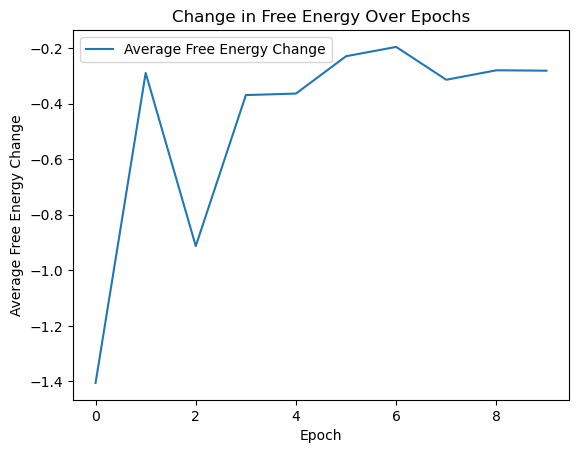

In [13]:
num_visible = 5
num_hidden = 3
rbm3 = RBM(num_visible=num_visible, num_hidden=num_hidden)
rbm3.initializeBiases()
rbm3.initializeWeights()

test_v = [[1, -1, -1, -1, -1], [-1, 1, -1, -1, 1], [1, 1, -1, 1, -1]]
hiddenConfigs = list(itertools.product([-1, 1], repeat=num_hidden))

for v in test_v:
	print(rbm3.freeEnergy1(v))

for v in test_v:
	total = 0
	for h in hiddenConfigs:
		total += np.exp(-rbm3.compute_energy(v, h))
	print(-np.log(total))

free_energies = rbm3.train_rbm2(data=data, learning_rate=0.1, mini_batch_size=64, k=1, num_epochs=10)
plt.plot(free_energies, label='Average Free Energy Change')
plt.xlabel('Epoch')
plt.ylabel('Average Free Energy Change')
plt.title('Change in Free Energy Over Epochs')
plt.legend()
plt.show()

# MNIST Application Here

In [14]:
from RBM_MNIST import *

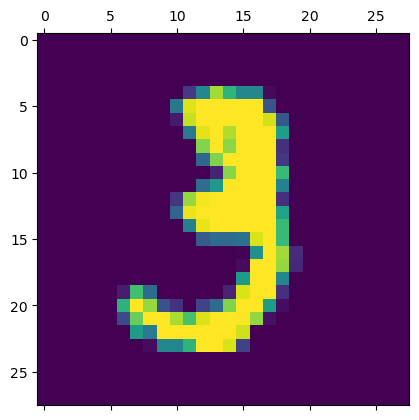

In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

batch_size = 1
train_loader = torch.utils.data.DataLoader(
datasets.MNIST('./data',
    train=True,
    download = True,
    transform = transforms.Compose(
        [transforms.ToTensor()])
     ),
     batch_size=batch_size
)
myData=[]
for idx, (data,target) in enumerate(train_loader):
  myData.append(np.array(data.view(-1,784)).flatten())
myData=np.matrix(myData)

# print(myData[0])
# print(np.shape(myData[0]))
# print(myData.shape)

pic=np.copy(myData[10,:])
pic=pic.reshape((28,28))
plt.matshow(pic)
plt.show()

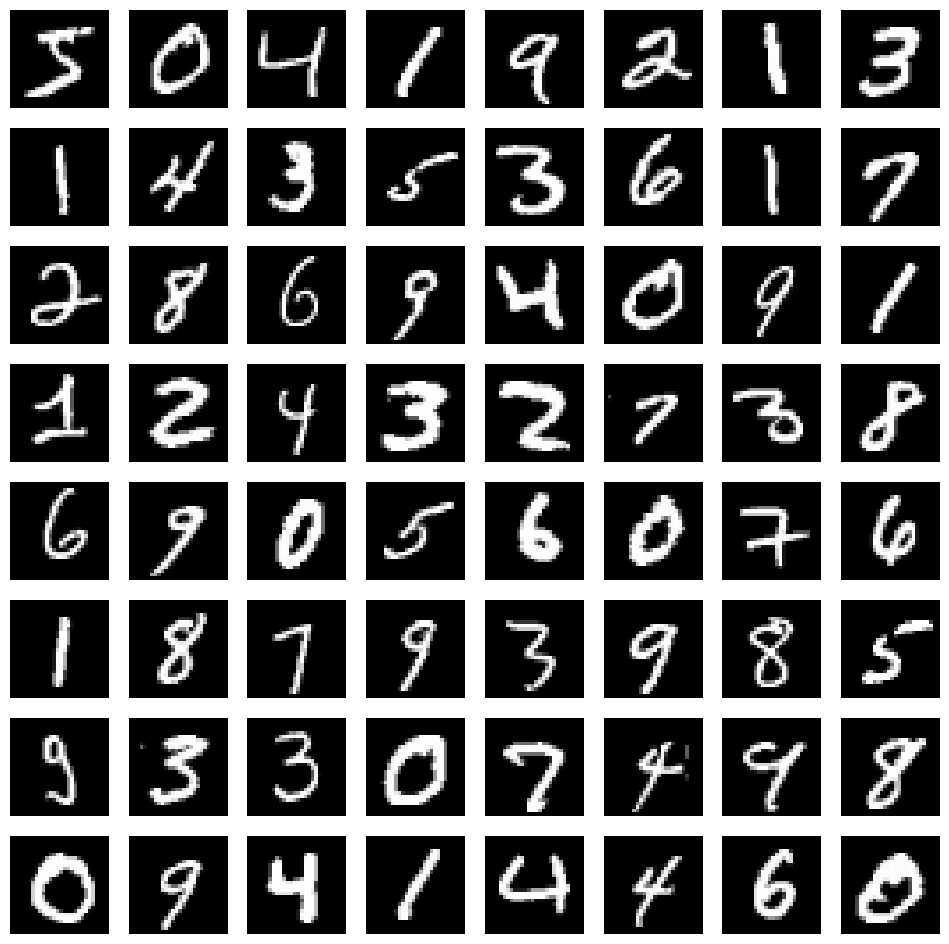

In [16]:
def PlotMe(myData):
	imageData = myData[:64]
	reshaped_images = []
	for row in imageData:
		pic = np.copy(row)
		reshaped_images.append(pic.reshape((28,28)))

	fig, axs = plt.subplots(8, 8, figsize=(12, 12))
	for i, ax in enumerate(axs.flat):
		ax.matshow(reshaped_images[i], cmap='gray')
		ax.axis('off')

PlotMe(myData=myData)


In [17]:
# print(myData.shape)
# print(len(myData))
# print(len(myData[0:64]))
# for i in range(0, len(myData), 64):
# 	mini_batch = data[i:i + 10000]
# 	print(mini_batch.shape)

In [18]:
# num_visible = 768
# num_hidden = 400
# rbm = RBM_MNIST(num_visible=num_visible, num_hidden=num_hidden)
# rbm.initializeBiases()
# rbm.initializeWeights()
# # data, learning_rate, mini_batch_size, k, num_epochs
# rbm.train_rbm(data=myData, learning_rate=0.1, mini_batch_size=64, k=1, num_epochs=60)

num_visible = 784
num_hidden = 10
rbm = RBM_MNIST(num_visible=num_visible, num_hidden=num_hidden)
rbm.initializeBiases()
rbm.initializeWeights()
rbm.train_rbm(data=myData, learning_rate=0.1, mini_batch_size=64, k=1, num_epochs=30)

# Reconstruct data using the trained RBM
# # Here, we are assuming that `get_newH` and `get_newV` are methods for sampling hidden and visible units respectively
# hidden = rbm.get_newH(visible)
# reconstructed_visible = rbm.get_newV(visible)

# # Visualize reconstructed data
# PlotMe(myData=reconstructed_visible)

ValueError: non-broadcastable output operand with shape (784,) doesn't match the broadcast shape (1,784)